In [1]:
import requests
import pandas as pd
from numpy import timedelta64
from datetime import datetime

from pprint import pprint




In [2]:
symbol = 'ETHUSDT'
tf = '1m'
endpoint = f'https://api.binance.com/api/v3/ticker?symbol={symbol}&windowSize={tf}'

In [3]:
df = pd.DataFrame()
start = datetime.now()
while True:
    response = requests.get(endpoint).json()
    
    # response = requests.get('https://api.binance.com/api/v3/ticker/24hr?symbol=ETHUSDT').json()
    
    
    pprint(response)
    data = pd.DataFrame([response])
    df = pd.concat([df,data])
    stop = datetime.now()
    if (stop - start).seconds > 60:
        break

df['openTime'] = pd.to_datetime(df['openTime'],unit='ms') + timedelta64(7,'h')
df['closeTime'] = pd.to_datetime(df['closeTime'],unit='ms') + timedelta64(7,'h')


# df


{'closeTime': 1704291451511,
 'count': 8164,
 'firstId': 1268856633,
 'highPrice': '2202.20000000',
 'lastId': 1268864796,
 'lastPrice': '2196.27000000',
 'lowPrice': '2191.00000000',
 'openPrice': '2200.55000000',
 'openTime': 1704291360000,
 'priceChange': '-4.28000000',
 'priceChangePercent': '-0.194',
 'quoteVolume': '8436679.78753500',
 'symbol': 'ETHUSDT',
 'volume': '3838.94500000',
 'weightedAvgPrice': '2197.65581105'}
{'closeTime': 1704291451661,
 'count': 8164,
 'firstId': 1268856633,
 'highPrice': '2202.20000000',
 'lastId': 1268864796,
 'lastPrice': '2196.27000000',
 'lowPrice': '2191.00000000',
 'openPrice': '2200.55000000',
 'openTime': 1704291360000,
 'priceChange': '-4.28000000',
 'priceChangePercent': '-0.194',
 'quoteVolume': '8436679.78753500',
 'symbol': 'ETHUSDT',
 'volume': '3838.94500000',
 'weightedAvgPrice': '2197.65581105'}
{'closeTime': 1704291451808,
 'count': 8188,
 'firstId': 1268856633,
 'highPrice': '2202.20000000',
 'lastId': 1268864820,
 'lastPrice': '

# GET DATA

In [3]:
def get_gd_data():
    gd_price = 11111111
    return gd_price

In [47]:
from numpy import timedelta64
from datetime import datetime
from pandas import to_datetime

def cvt_ts(dct, unit= 'ms'):
    dct['openTime'] = to_datetime(dct['openTime'], unit= unit) + timedelta64(7, 'h')
    dct['closeTime'] = to_datetime(dct['closeTime'], unit= unit) + timedelta64(7, 'h')
    return dct

import requests
def get_data(symbol= 'ETHUSDT', tf= '1m'):
    endpoint = f'https://api.binance.com/api/v3/ticker?symbol={symbol}&windowSize={tf}'
    
    res = requests.get(endpoint).json()
    res = {k: float(v) for k, v in res.items() if k != 'symbol'}
    
    return res

def my_extractor(dct):
    dct['base_hour'] = dct['closeTime'].hour

    
    return dct
    

In [5]:
data = get_data()
data = cvt_ts(data)
print(f"start time {data['openTime']} \t close time :{data['closeTime']}")
data_date = data['closeTime'].date()
data_hour = data['closeTime'].hour
data_min = data['closeTime'].minute
print(data_date)
print(data_hour)
print(data_min)

start time 2023-12-29 00:56:00 	 close time :2023-12-29 00:57:08.695000064
2023-12-29
0
57


# AGGREAGATE

https://riverml.xyz/0.18.0/api/feature-extraction/Agg/

In [6]:
from river import utils
from river import stats
from river import feature_extraction as fx

In [10]:
agg = fx.Agg(
    on= 'highPrice',
    by= 'base_hour',
    how= stats.Mean()
)

# fx.Agg สามารถใส่ list of aggraetion func เข้าไปได้

In [8]:
for i in range(2):
    # get data
    data = get_data()
    # convert timestamp
    data = cvt_ts(data)
    # custom extraction
    data = my_extractor(data)
    # print(data)
    
    # aggregate
    agg = agg.learn_one(data)
    mean_resault = agg.transform_one(data)
    data.update(mean_resault)
    pprint(data)

AttributeError: 'NoneType' object has no attribute 'transform_one'

In [12]:
for i in range(2):
    # get data
    data = get_data()
    # convert timestamp
    data = cvt_ts(data)
    # custom extraction
    data = my_extractor(data)
    # print(data)
    
    # aggregate
    agg.learn_one(data)
    mean_resault = agg.transform_one(data)
    data.update(mean_resault)
    # pprint(data)

In [33]:
from time import sleep

agg = fx.Agg(
    on= 'highPrice',
    by= 'base_hour',
    how= stats.Mean()
)

# fx.Agg สามารถใส่ list of aggraetion func เข้าไปได้

mean_high_price = fx.Agg(
    on= 'lastPrice',
    by= 'base_hour',
    how= stats.Mean()
)

max_pct_price_chg = fx.Agg(
    on= 'priceChangePercent',
    by= 'base_hour',
    how = stats.Max()
)

min_pct_price_chg = fx.Agg(
    on= 'priceChangePercent',
    by= 'base_hour',
    how = stats.Min()
)

agg = (mean_high_price + max_pct_price_chg + min_pct_price_chg)

for i in range(10):
    # get data
    data = get_data()
    # convert timestamp
    data = cvt_ts(data)
    # custom extraction
    data = my_extractor(data)
    # print(data['lastPrice'])
    # print(data)
    
    # aggregate
    agg.learn_one(data)
    mean_resault = agg.transform_one(data)
    # print(agg.transform_one(data))
    # print(mean_resault)
    data.update(mean_resault)
    print(data)
    # pprint(data)
    sleep(1)

{'priceChange': -5.97, 'priceChangePercent': -0.253, 'weightedAvgPrice': 2350.99209827, 'openPrice': 2356.16, 'highPrice': 2356.17, 'lowPrice': 2349.0, 'lastPrice': 2350.19, 'volume': 1061.6587, 'quoteVolume': 2495951.214764, 'openTime': Timestamp('2023-12-29 01:16:00'), 'closeTime': Timestamp('2023-12-29 01:17:40.648000'), 'firstId': 1264110513.0, 'lastId': 1264112917.0, 'count': 2405.0, 'base_hour': 1, 'priceChangePercent_min_by_base_hour': -0.253, 'priceChangePercent_max_by_base_hour': -0.253, 'lastPrice_mean_by_base_hour': 2350.19}
{'priceChange': -6.33, 'priceChangePercent': -0.269, 'weightedAvgPrice': 2350.99102129, 'openPrice': 2356.16, 'highPrice': 2356.17, 'lowPrice': 2349.0, 'lastPrice': 2349.83, 'volume': 1062.8436, 'quoteVolume': 2498735.760636, 'openTime': Timestamp('2023-12-29 01:16:00'), 'closeTime': Timestamp('2023-12-29 01:17:41.800999936'), 'firstId': 1264110513.0, 'lastId': 1264112938.0, 'count': 2426.0, 'base_hour': 1, 'priceChangePercent_min_by_base_hour': -0.269, 

In [54]:
agg[0].by

['base_hour']

In [57]:
agg[0].on

'lastPrice'

In [64]:
str(agg[1].how).split(':')[0].lower()

'max'

In [69]:
for i in range(len(agg)):
    print(i)

0
1
2


In [67]:
def get_agg_feature_name(agg_item):
    return '_'.join([agg_item.on , str(agg_item.how).split(':')[0].lower(),'by', agg_item.by[0]])

get_agg_feature_name(agg[1])

'priceChangePercent_max_by_base_hour'

In [ ]:
# AGG VERSION BASE

In [ ]:
from time import sleep

agg = fx.Agg(
    on= 'highPrice',
    by= 'base_hour',
    how= stats.Mean()
)

# fx.Agg สามารถใส่ list of aggraetion func เข้าไปได้

mean_high_price = fx.Agg(
    on= 'highPrice',
    by= 'base_hour',
    how= stats.Mean()
)

max_pct_price_chg = fx.Agg(
    on= 'priceChangePercent',
    by= 'base_hour',
    how = stats.Max()
)

agg = (mean_high_price + max_pct_price_chg)

for i in range(20):
    # get data
    data = get_data()
    # convert timestamp
    data = cvt_ts(data)
    # custom extraction
    data = my_extractor(data)
    # print(data)
    
    # aggregate
    agg = agg.learn_one(data)
    mean_resault = agg.transform_one(data)
    print(mean_resault)
    data.update(mean_resault)
    # pprint(data)
    sleep(1)

In [165]:
from river import stats
from pprint import pprint
stat = stats.Shift(2) #| stats.Mean()
dct = {
    'data_ts': 0,
    'data_ts2': 0,
    'price_timestap': 0
}
 
lst_data = []
for i in range(5):
    dct_x = {
        'data_ts': i,
        'data_ts2': i
    }
    print(dct_x)
    stat = stat.update(dct_x)
    print('stat::::',stat)
    # print(stat.get())
 
    dct['price_timestap'] = i
    old_dct_x = stat.get()
    print('old x',old_dct_x)
    # dct['data_ts'] = old_dct_x['data_ts']
    # dct['data_ts2'] = old_dct_x['data_ts2']
  
    lst_data.append(dct)
    pprint(dct)
# print(lst_data)
 

{'data_ts': 0, 'data_ts2': 0}
stat:::: Shift: None
old x None
{'data_ts': 0, 'data_ts2': 0, 'price_timestap': 0}
{'data_ts': 1, 'data_ts2': 1}
stat:::: Shift: None
old x None
{'data_ts': 0, 'data_ts2': 0, 'price_timestap': 1}
{'data_ts': 2, 'data_ts2': 2}
stat:::: 

TypeError: unsupported format string passed to dict.__format__

In [193]:
from river import stats
from pprint import pprint

class MultiKeyShift:
    def __init__(self, keys, window_size):
        self.keys = keys
        self.shifts = {key: stats.Shift(window_size) for key in keys}

    def update(self, dct):
        return {key: self.shifts[key].update(dct[key]) for key in self.keys}

# Example usage
keys_to_shift = ['data_ts', 'data_ts2']
multi_key_shift = MultiKeyShift(keys=keys_to_shift, window_size=0)


# CALL MODULE

lst_data = []
for i in range(5):
    dct_x = {
        'data_ts': i,
        'data_ts2': i
    }
    updated_dict = multi_key_shift.update(dct_x)
    # pprint(updated_dict)

    dct = {
        'data_ts': updated_dict['data_ts'],
        'data_ts2': updated_dict['data_ts2'],
        'price_timestap': i
    }

    lst_data.append(dct)
    pprint(dct)

# Print the final list of dictionaries
pprint(lst_data)


{'data_ts': Shift: 0., 'data_ts2': Shift: 0., 'price_timestap': 0}
{'data_ts': Shift: 1., 'data_ts2': Shift: 1., 'price_timestap': 1}
{'data_ts': Shift: 2., 'data_ts2': Shift: 2., 'price_timestap': 2}
{'data_ts': Shift: 3., 'data_ts2': Shift: 3., 'price_timestap': 3}
{'data_ts': Shift: 4., 'data_ts2': Shift: 4., 'price_timestap': 4}
[{'data_ts': Shift: 4., 'data_ts2': Shift: 4., 'price_timestap': 0},
 {'data_ts': Shift: 4., 'data_ts2': Shift: 4., 'price_timestap': 1},
 {'data_ts': Shift: 4., 'data_ts2': Shift: 4., 'price_timestap': 2},
 {'data_ts': Shift: 4., 'data_ts2': Shift: 4., 'price_timestap': 3},
 {'data_ts': Shift: 4., 'data_ts2': Shift: 4., 'price_timestap': 4}]


In [178]:
from river import stats
from pprint import pprint

class MultiKeyShift:
    def __init__(self, keys, window_size, period):
        self.keys = keys
        self.shifts = {key: stats.Shift(window_size) for key in keys}

    def update(self, dct):
        return {key: self.shifts[key].update(dct[key]) for key in self.keys}

# Example usage
keys_to_shift = ['data_ts', 'data_ts2']
multi_key_shift = MultiKeyShift(keys=keys_to_shift, window_size=2)

lst_data = []
for i in range(5):
    dct_x = {
        'data_ts': i,
        'data_ts2': i
    }
    updated_dict = multi_key_shift.update(dct_x)
    # pprint(updated_dict)

    dct = {
        'data_ts': updated_dict['data_ts'],
        'data_ts2': updated_dict['data_ts2'],
        'price_timestap': i
    }

    lst_data.append(dct)
    pprint(dct)

# Print the final list of dictionaries
# pprint(lst_data)


{'data_ts': Shift: None, 'data_ts2': Shift: None, 'price_timestap': 0}
{'data_ts': Shift: None, 'data_ts2': Shift: None, 'price_timestap': 1}
{'data_ts': Shift: 0., 'data_ts2': Shift: 0., 'price_timestap': 2}
{'data_ts': Shift: 1., 'data_ts2': Shift: 1., 'price_timestap': 3}
{'data_ts': Shift: 2., 'data_ts2': Shift: 2., 'price_timestap': 4}


In [179]:
from river import stats

class ShiftingState:
    def __init__(self, keys, window_size, period):
        self.keys = keys
        self.shifts = {key: stats.Shift(window_size) for key in keys}
        self.stat = stats.Shift(period)

    def update(self, dct):
        shifted_data = {key: self.shifts[key].update(dct[key]) for key in self.keys}
        self.stat = self.stat.update(shifted_data)
        return shifted_data

    def shift_back_data(self, dct):
        lst_price = dct.pop('lastPrice')
        dct_x = dct

        self.stat = self.stat.update(dct_x)
        dct_x = self.stat.get()

        current_data = {**dct_x, 'lastPrice': lst_price}
        return current_data

# Initialize ShiftingState object outside the loop
shifting_state = ShiftingState(keys=['data_ts', 'data_ts2'], window_size=2, period=180)

for record in lst_raw_data:
    print('Before preprocess:', record)

    prep_rec = preprocessing_pipeline(record)

    # Use shifting_state for update and shift_back_data
    shifted_data = shifting_state.update(prep_rec)
    prep_rec = shifting_state.shift_back_data(shifted_data)

    print('After preprocess:', prep_rec)


NameError: name 'lst_raw_data' is not defined

In [203]:
base_dct = {'a':1, 'b':2}
base_dct.get('a')

1

In [146]:
from river import stats
from pprint import pprint
stat = stats.Shift(2) #| stats.Mean()
dct = {
    'data_ts': 0,
    'price_timestap': 0
}
 
lst_data = []
for i in range(15):
    stat = stat.update(i)
    print(stat.get())
 
    dct['price_timestap'] = i
    dct['data_ts']= stat.get()
 
    lst_data.append(dct)
    pprint(dct)
# print(lst_data)
 

None
{'data_ts': None, 'price_timestap': 0}
None
{'data_ts': None, 'price_timestap': 1}
0
{'data_ts': 0, 'price_timestap': 2}
1
{'data_ts': 1, 'price_timestap': 3}
2
{'data_ts': 2, 'price_timestap': 4}
3
{'data_ts': 3, 'price_timestap': 5}
4
{'data_ts': 4, 'price_timestap': 6}
5
{'data_ts': 5, 'price_timestap': 7}
6
{'data_ts': 6, 'price_timestap': 8}
7
{'data_ts': 7, 'price_timestap': 9}
8
{'data_ts': 8, 'price_timestap': 10}
9
{'data_ts': 9, 'price_timestap': 11}
10
{'data_ts': 10, 'price_timestap': 12}
11
{'data_ts': 11, 'price_timestap': 13}
12
{'data_ts': 12, 'price_timestap': 14}


# MAKE CUSTOMIZE FUNCTION FOR PIPELINE

In [200]:
from river import base, stats, utils

class RollingMeanTransformer(base.Transformer):
    def __init__(self, window_size):
        self.window_size = window_size
        self.rmean = utils.Rolling(stats.Mean(), window_size=window_size)

    def learn_one(self, x):
        self.rmean.update(x)
        return self

    def transform_one(self, x):
        return self.rmean.get()

# Example usage
X = [1, 3, 5, 7]
pipeline = RollingMeanTransformer(window_size=3)

for x in X:
    pipeline.learn_one(x)
    print(pipeline.transform_one(x))

1.0
2.0
3.0
5.0


# EXPLORE DATA

In [220]:
import os

dir_path = '../dataset/realtime/'
lst_file = os.listdir(dir_path)

lst_path = [os.path.join(dir_path,x) for x in lst_file]
lst_path

['../dataset/realtime/raw_bnbusdt_1m.csv',
 '../dataset/realtime/raw_btcusdt_1m.csv',
 '../dataset/realtime/raw_ethusdt_1m.csv']

In [218]:
for fname in lst_file:
    f_path = os.path.join(dir_path, fname)
    print(f_path)

../dataset/realtime/raw_bnbusdt_1m.csv
../dataset/realtime/raw_btcusdt_1m.csv
../dataset/realtime/raw_ethusdt_1m.csv


In [232]:
import glob
lst_path_glob = glob.glob(os.path.join(dir_path, '*1m.csv'))
for _path in lst_path_glob:
    df = pd.read_csv(_path)

In [233]:
df

,0.53,0.024,2248.56396326,2248.53,2249.06,2248.1,2249.06.1,241.2897,542555.324125,1702719600000.0,1702719675826.0,1254227264.0,1254227895.0,632.0
0,0.53,0.024,2248.585990,2248.53,2249.06,2248.10,2249.06,252.5022,567772.909250,1.702720e+12,1.702720e+12,1.254227e+09,1.254228e+09,657.0
1,0.53,0.024,2248.614977,2248.53,2249.06,2248.10,2249.06,268.9492,604763.199070,1.702720e+12,1.702720e+12,1.254227e+09,1.254228e+09,688.0
2,0.53,0.024,2248.634107,2248.53,2249.06,2248.10,2249.06,281.0505,631979.739968,1.702720e+12,1.702720e+12,1.254227e+09,1.254228e+09,711.0
3,0.54,0.024,2248.644973,2248.53,2249.07,2248.10,2249.07,288.4090,648529.447996,1.702720e+12,1.702720e+12,1.254227e+09,1.254228e+09,720.0
4,0.67,0.030,2248.647314,2248.53,2249.21,2248.10,2249.20,289.8674,651809.550299,1.702720e+12,1.702720e+12,1.254227e+09,1.254228e+09,734.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31140,1.75,0.078,2234.947509,2234.23,2235.99,2234.23,2235.98,112.4439,251306.214198,1.702756e+12,1.702756e+12,1.254464e+09,1.254464e+09,377.0
31141,2.16,0.097,2234.981874,2234.23,2236.39,2234.23,2236.39,116.0009,259259.908903,1.702756e+12,1.702756e+12,1.254464e+09,1.254464e+09,406.0
31142,2.17,0.097,2234.983951,2234.23,2236.40,2234.23,2236.40,116.1710,259640.320543,1.702756e+12,1.702756e+12,1.254464e+09,1.254464e+09,407.0
31143,2.17,0.097,2234.987024,2234.23,2236.41,2234.23,2236.40,116.4229,260203.670763,1.702756e+12,1.702756e+12,1.254464e+09,1.254464e+09,415.0


In [95]:
import pandas as pd
def get_data_dev(ret= 'dict'):
    
    csv_header = ['priceChange', 'priceChangePercent', 
                  'weightedAvgPrice', 'openPrice', 
                  'highPrice', 'lowPrice', 
                  'lastPrice', 'volume', 
                  'quoteVolume', 'openTime', 
                  'closeTime', 'firstId', 
                  'lastId', 'count'
                  ]
    df = pd.read_csv('../dataset/realtime/raw_ethusdt_1m.csv', names= csv_header)
    # df_eth.head()
    if ret == 'df':
        return df
    lst_dct = df.to_dict('records')
    print('toto record :', len(lst_dct))
    return lst_dct

84048


<Axes: >

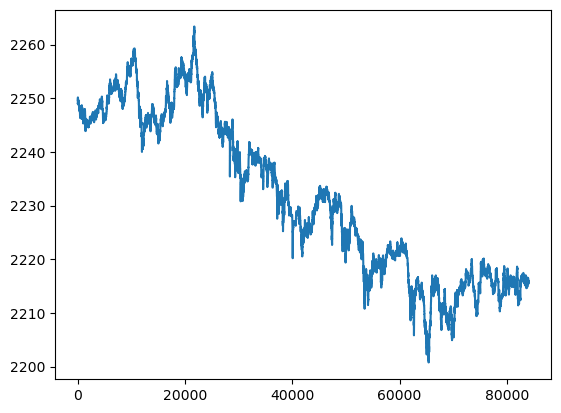

In [104]:
df_btc = get_data_dev(ret='df')
print(len(df_btc))
df_btc['lastPrice'].plot()

In [105]:
df_btc['timestamp'] = pd.to_datetime(df_btc['closeTime'], unit= 'ms')
df = df_btc[['timestamp','priceChange', 'priceChangePercent',  'openPrice', 'highPrice', 'lowPrice', 'lastPrice']]

In [106]:
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['min'] = df['timestamp'].dt.minute
df.head()


C:\Users\kimte\AppData\Local\Temp\ipykernel_9992\257489302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['timestamp'].dt.date
C:\Users\kimte\AppData\Local\Temp\ipykernel_9992\257489302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['timestamp'].dt.hour
C:\Users\kimte\AppData\Local\Temp\ipykernel_9992\257489302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,timestamp,priceChange,priceChangePercent,openPrice,highPrice,lowPrice,lastPrice,date,hour,min
0,2023-12-16 09:41:15.825999872,0.53,0.024,2248.53,2249.06,2248.1,2249.06,2023-12-16,9,41
1,2023-12-16 09:41:16.976000000,0.53,0.024,2248.53,2249.06,2248.1,2249.06,2023-12-16,9,41
2,2023-12-16 09:41:18.175000064,0.53,0.024,2248.53,2249.06,2248.1,2249.06,2023-12-16,9,41
3,2023-12-16 09:41:19.348999936,0.53,0.024,2248.53,2249.06,2248.1,2249.06,2023-12-16,9,41
4,2023-12-16 09:41:20.515000064,0.54,0.024,2248.53,2249.07,2248.1,2249.07,2023-12-16,9,41


In [107]:
target_date = pd.to_datetime('2023-12-16').date()
print(type(target_date))
# target_date = pd.to_datetime('2023-12-16')
print(target_date)

<class 'datetime.date'>
2023-12-16


In [109]:
df = df.loc[
    (df['hour'] == 20) & (df['min'] == 11) & (df['date'] == target_date)
     ]

df_rt = df.copy()
df_rt.tail()

,timestamp,priceChange,priceChangePercent,openPrice,highPrice,lowPrice,lastPrice,date,hour,min
32316,2023-12-16 20:11:54.560999936,-0.76,-0.034,2240.26,2240.4,2239.49,2239.50,2023-12-16,20,11
32317,2023-12-16 20:11:55.720000000,-0.77,-0.034,2240.26,2240.4,2239.49,2239.49,2023-12-16,20,11
32318,2023-12-16 20:11:56.881999872,-0.76,-0.034,2240.26,2240.4,2239.49,2239.50,2023-12-16,20,11
32319,2023-12-16 20:11:58.032000000,-0.77,-0.034,2240.26,2240.4,2239.49,2239.49,2023-12-16,20,11
32320,2023-12-16 20:11:59.177999872,-0.69,-0.031,2240.26,2240.4,2239.49,2239.57,2023-12-16,20,11


In [103]:
import ccxt
start_date = '2023-12-16'
exchange = ccxt.binance()
from_ts = exchange.parse8601(start_date)#'2023-01-01 00:00:00')
from_ts
df = exchange.fetch_ohlcv('ETHUSDT', timeframe='1m', limit= 2000)
df = pd.DataFrame(df, columns=['timestamp', 'open', 'high','low','close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit= 'ms')
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['min'] = df['timestamp'].dt.minute
df.head()



,timestamp,open,high,low,close,volume,date,hour,min
0,2023-12-16 20:11:00,2240.03,2240.20,2239.49,2239.76,52.5870,2023-12-16,20,11
1,2023-12-16 20:12:00,2239.76,2240.00,2239.64,2239.99,91.5266,2023-12-16,20,12
2,2023-12-16 20:13:00,2240.00,2240.40,2239.53,2239.53,83.5424,2023-12-16,20,13
3,2023-12-16 20:14:00,2239.54,2239.65,2239.37,2239.55,72.4288,2023-12-16,20,14
4,2023-12-16 20:15:00,2239.54,2240.33,2237.89,2237.90,303.5406,2023-12-16,20,15


In [7]:
import pandas as pd
df = pd.read_csv('../amf_n10_step5.csv')
df['error'] = (df['y_actual'] - df['y_predict']).abs()
df.tail()

,openPrice,highPrice,lowPrice,priceChangePercent,volume,hour,priceChangePercent_max_by_hour,priceChangePercent_min_by_hour,closeTime,y_actual,y_predict,MSE,error
3595,2247.28,2247.75,2247.11,0.020,116.7622,17.0,0.06,-0.126,2023-12-16 17:51:31.763000064,2247.05,2246.978539,MSE: 0.003856,0.071461
3596,2247.28,2247.75,2247.11,0.014,118.7909,17.0,0.06,-0.126,2023-12-16 17:51:32.942000128,2247.04,2246.958773,MSE: 0.003856,0.081227
3597,2247.28,2247.75,2247.11,0.014,119.0482,17.0,0.06,-0.126,2023-12-16 17:51:34.124999936,2247.04,2246.974594,MSE: 0.003856,0.065406
3598,2247.28,2247.75,2247.11,0.014,120.1599,17.0,0.06,-0.126,2023-12-16 17:51:35.467000064,2247.05,2246.978772,MSE: 0.003856,0.071228
3599,2247.28,2247.75,2247.11,0.008,125.5815,17.0,0.06,-0.126,2023-12-16 17:51:36.633999872,2247.05,2246.975854,MSE: 0.003856,0.074146


In [8]:
df.describe()

,openPrice,highPrice,lowPrice,priceChangePercent,volume,hour,priceChangePercent_max_by_hour,priceChangePercent_min_by_hour,y_actual,y_predict,error
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3600.000000,3299.000000,3299.000000
mean,2246.647615,2247.068509,2246.179658,-0.001685,147.377358,16.710909,0.055306,-0.094963,2246.621669,2246.401731,0.086384
std,1.213331,1.227913,1.161083,0.035839,87.284807,0.453409,0.017532,0.040028,1.144078,0.900208,0.124592
min,2244.650000,2244.860000,2243.900000,-0.126000,29.068000,16.000000,0.000000,-0.126000,2243.900000,2243.903872,0.000000
25%,2245.730000,2246.120000,2245.280000,-0.023000,89.194200,16.000000,0.045000,-0.126000,2245.780000,2245.689986,0.015163
50%,2246.400000,2247.010000,2245.930000,0.002000,120.790950,17.000000,0.045000,-0.126000,2246.560000,2246.396737,0.047441
75%,2247.280000,2247.840000,2246.880000,0.020000,181.283350,17.000000,0.073000,-0.070000,2247.210000,2247.005015,0.109353
max,2249.510000,2250.170000,2249.100000,0.103000,527.303900,17.000000,0.103000,0.024000,2250.170000,2248.708863,1.503311


In [10]:
df.loc[df['error'] > 0.109353]

,openPrice,highPrice,lowPrice,priceChangePercent,volume,hour,priceChangePercent_max_by_hour,priceChangePercent_min_by_hour,closeTime,y_actual,y_predict,MSE,error
308,2248.53,2249.21,2248.10,0.030,294.1756,16.0,0.030,0.024,2023-12-16 16:47:25.985999872,2248.54,2248.174887,MSE: 0.003856,0.365113
309,2248.53,2249.21,2248.10,0.030,296.1534,16.0,0.030,0.024,2023-12-16 16:47:27.305999872,2248.55,2248.274470,MSE: 0.003856,0.275530
310,2248.53,2249.21,2248.10,0.030,296.1534,16.0,0.030,0.024,2023-12-16 16:47:28.462000128,2248.55,2248.326459,MSE: 0.003856,0.223541
311,2248.53,2249.21,2248.10,0.030,302.8144,16.0,0.030,0.024,2023-12-16 16:47:29.620999936,2248.54,2248.361709,MSE: 0.003856,0.178291
315,2248.53,2249.50,2248.10,0.043,324.8790,16.0,0.043,0.024,2023-12-16 16:47:34.272000,2248.17,2248.316197,MSE: 0.003856,0.146197
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509,2247.12,2247.28,2247.02,0.007,56.3251,17.0,0.060,-0.126,2023-12-16 17:49:51.608999936,2246.64,2246.764011,MSE: 0.003856,0.124011
3537,2247.12,2247.28,2247.02,0.001,88.2127,17.0,0.060,-0.126,2023-12-16 17:50:24.132999936,2246.78,2246.649256,MSE: 0.003856,0.130744
3584,2247.28,2247.75,2247.11,0.021,111.4236,17.0,0.060,-0.126,2023-12-16 17:51:18.979000064,2247.04,2246.899874,MSE: 0.003856,0.140126
3585,2247.28,2247.75,2247.11,0.020,111.9304,17.0,0.060,-0.126,2023-12-16 17:51:20.151000064,2247.03,2246.909081,MSE: 0.003856,0.120919


In [14]:
df.iloc[300:320]

,openPrice,highPrice,lowPrice,priceChangePercent,volume,hour,priceChangePercent_max_by_hour,priceChangePercent_min_by_hour,closeTime,y_actual,y_predict,MSE,error
300,2248.53,2249.06,2248.1,0.024,241.2897,16.0,0.024,0.024,2023-12-16 16:47:16.508999936,2248.17,NaN,MSE: 0.003856,NaN
301,2248.53,2249.06,2248.1,0.024,252.5022,16.0,0.024,0.024,2023-12-16 16:47:17.684999936,2248.17,2248.170000,MSE: 0.003856,0.000000
302,2248.53,2249.06,2248.1,0.024,268.9492,16.0,0.024,0.024,2023-12-16 16:47:18.865999872,2248.17,2248.170000,MSE: 0.003856,0.000000
303,2248.53,2249.06,2248.1,0.024,281.0505,16.0,0.024,0.024,2023-12-16 16:47:20.016000,2248.18,2248.170000,MSE: 0.003856,0.010000
304,2248.53,2249.07,2248.1,0.024,288.4090,16.0,0.024,0.024,2023-12-16 16:47:21.196000,2248.17,2248.173959,MSE: 0.003856,0.003959
305,2248.53,2249.21,2248.1,0.030,289.8674,16.0,0.030,0.024,2023-12-16 16:47:22.348000,2248.18,2248.171062,MSE: 0.003856,0.008938
306,2248.53,2249.21,2248.1,0.030,289.8674,16.0,0.030,0.024,2023-12-16 16:47:23.492000,2248.17,2248.175829,MSE: 0.003856,0.005829
307,2248.53,2249.21,2248.1,0.030,290.0356,16.0,0.030,0.024,2023-12-16 16:47:24.652999936,2248.18,2248.172664,MSE: 0.003856,0.007336
308,2248.53,2249.21,2248.1,0.030,294.1756,16.0,0.030,0.024,2023-12-16 16:47:25.985999872,2248.54,2248.174887,MSE: 0.003856,0.365113
309,2248.53,2249.21,2248.1,0.030,296.1534,16.0,0.030,0.024,2023-12-16 16:47:27.305999872,2248.55,2248.274470,MSE: 0.003856,0.275530


In [9]:
## READ DATA FROM CSV
# header 
def get_data_dev(path= '../dataset/realtime/raw_ethusdt_1m.csv', nrow= 100):
    
    csv_header = ['priceChange', 'priceChangePercent', 
                  'weightedAvgPrice', 'openPrice', 
                  'highPrice', 'lowPrice', 
                  'lastPrice', 'volume', 
                  'quoteVolume', 'openTime', 
                  'closeTime', 'firstId', 
                  'lastId', 'count'
                  ]

    if nrow == 0:
        nrow = 99999999999999999999
    df = pd.read_csv(path, names= csv_header, nrows= nrow)
    # df_eth.head()
    return df
    lst_dct = df.to_dict('records')
    print('toto record :', len(lst_dct))
    return lst_dct

In [5]:
import pandas as pd

In [12]:
df_raw = get_data_dev(nrow=10)

In [16]:
df_select = df_raw[['priceChange', 'lastPrice']]
df_select.head()

,priceChange,lastPrice
0,0.53,2249.06
1,0.53,2249.06
2,0.53,2249.06
3,0.53,2249.06
4,0.54,2249.07


In [22]:
df_select['price_shift'] = df_select['lastPrice'].shift(-14)
df_select

C:\Users\kimte\AppData\Local\Temp\ipykernel_15692\3839573538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['price_shift'] = df_select['lastPrice'].shift(-14)


,priceChange,lastPrice,price_shift
0,0.53,2249.06,NaN
1,0.53,2249.06,NaN
2,0.53,2249.06,NaN
3,0.53,2249.06,NaN
4,0.54,2249.07,NaN
5,0.67,2249.20,NaN
6,0.67,2249.20,NaN
7,0.68,2249.21,NaN
8,0.68,2249.21,NaN
9,0.67,2249.20,NaN


In [ ]:
d={'col1': 5, 'col2': 6} 
df.loc[len(df)]=d

In [34]:
test_df = pd.DataFrame([{'x': 1, 'y':2}])
test_df.loc[len(test_df)] = {'x':2, 'y': 3}

In [46]:
get_data()

NameError: name 'get_data' is not defined

In [54]:
type(get_data())#

dict

In [59]:
import requests
def get_data(symbol= 'ETHUSDT', tf= '1m'):
    endpoint = f'https://api.binance.com/api/v3/ticker?symbol={symbol}&windowSize={tf}'
    
    res = requests.get(endpoint).json()
    res = {k: float(v) for k, v in res.items() if k != 'symbol'}
    
    return res

shift_size = 10
test_df = pd.DataFrame([{'x': 0, 'y':0}])
for i in range(1,20):
    data = get_data()
    dct = {
        'x': data['priceChange'],
        'y': data['lastPrice']
    }
    test_df.loc[len(test_df)] = dct #{'x':i, 'y': i}
    test_df['y_shift'] = test_df['y'].shift(-shift_size)
    print('data to train')
    # test_df = test_df.iloc[:shift_size]

data to train
data to train
data to train
data to train
data to train
data to train
data to train
data to train
data to train
data to train
data to train
data to train
data to train
data to train
data to train
data to train
data to train
data to train
data to train


In [60]:
test_df

,x,y,y_shift
0,0.00,0.00,2193.43
1,-2.56,2193.80,2193.43
2,-2.56,2193.80,2193.43
3,-2.56,2193.80,2193.43
4,-2.56,2193.80,2193.43
5,-2.56,2193.80,2193.43
6,-2.56,2193.80,2193.43
7,-2.56,2193.80,2193.43
8,-2.56,2193.80,2193.43
9,-2.56,2193.80,2193.43


In [61]:


shift_size = 10
# test_df = pd.DataFrame([{'x': 0, 'y':0}])
for i in range(1):
    data = get_data()
    dct = {
        'x': data['priceChange'],
        'y': data['lastPrice']
    }
    test_df.loc[len(test_df)] = dct #{'x':i, 'y': i}
    test_df['y_shift'] = test_df['y'].shift(-shift_size)
    # print('data to train')
    # test_df = test_df.iloc[:shift_size]
    
test_df

,x,y,y_shift
0,0.00,0.00,2193.43
1,-2.56,2193.80,2193.43
2,-2.56,2193.80,2193.43
3,-2.56,2193.80,2193.43
4,-2.56,2193.80,2193.43
5,-2.56,2193.80,2193.43
6,-2.56,2193.80,2193.43
7,-2.56,2193.80,2193.43
8,-2.56,2193.80,2193.43
9,-2.56,2193.80,2193.43
